In [1]:
!pip install rebound


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

# Load the CSV file into a pandas DataFrame without headers
df = pd.read_csv("C:/Users/Arkaprova Dutta/Desktop/PH4203; TP/E9.csv", header=None)

# Group the DataFrame by the names in the second column
grouped = df.groupby(df.iloc[:, 1])

# Initialize an empty list to store dictionaries
output = []

# Initialize a counter
counter = 1

# Iterate over each group
for name, group in grouped:
    # Create a dictionary for planetary data within the current group
    planet_data = {}
    period_data = {}
    mass_star = None  # Initialize mass_star variable outside the loop
    orb_per = None  # Initialize orbital period variable outside the loop
    for index, row in group.iterrows():
        # Extract data from each column
        eccentricity = row.iloc[2]
        mass_planets = row.iloc[3]
        semi_maj = row.iloc[5]  # Semi-major axis index corrected
        mass_star = row.iloc[4]  # Include star mass
        orb_per = row.iloc[6]  # Include orbital period

        # Check if values are not NaN
        if not np.isnan(eccentricity) and not np.isnan(mass_planets) and not np.isnan(semi_maj) and not np.isnan(mass_star):
            # Create a dictionary for a single planet and store parameters
            planet_dict = {"a": semi_maj, "e": eccentricity, "m": mass_planets}  # Assuming 'a' for semi-major axis
            planet_data[index] = planet_dict
            
            period_dict = {"p": orb_per}
            period_data[index] = period_dict

    # Check if the current group has at least three planets
    if len(planet_data) >= 3:
        # Append the dictionary to the output list with 'Planet Data' as a list
        output.append({
            'No.': counter,
            'Host Names': name,
            'Planet Data': list(planet_data.values()),
            'Mass Star': mass_star,  # Add star mass as a separate column
            'Orbital Period': list(period_data.values())  # Add planetary period as a separate column
        })
        counter += 1

# Convert the list of dictionaries to a DataFrame
odf = pd.DataFrame(output)

# Print the output as a table
print(odf.to_string(index=False))

 No.     Host Names                                                                                                                                                                                                                                                  Planet Data  Mass Star                                                                                            Orbital Period
   1         47 UMa                                                                                                                                             [{'a': 2.1, 'e': 0.032, 'm': 804.08}, {'a': 3.6, 'e': 0.098, 'm': 171.621}, {'a': 11.6, 'e': 0.16, 'm': 521.22}]       1.06                                                            [{'p': 1078.0}, {'p': 2391.0}, {'p': 14002.0}]
   2         55 Cnc                                                                   [{'a': 0.1134, 'e': 0.0, 'm': 255.4}, {'a': 0.2373, 'e': 0.03, 'm': 51.2}, {'a': 5.957, 'e': 0.13, 'm': 991.6}, {'a': 0.01544, 'e': 0.

In [3]:
import rebound
import numpy as np

# Function to find resonant frequencies for orbital periods
def find_orbital_period_resonances(simulation):
    orbital_periods = [p.P for p in simulation.particles[1:]]  # Orbital periods of all planets (excluding star)
    resonant_periods = set()  # Set to store resonant periods

    # Iterate over pairs of planets to find resonances
    for i in range(len(orbital_periods)):
        for j in range(i+1, len(orbital_periods)):
            period_ratio = orbital_periods[i] / orbital_periods[j]
            if period_ratio > 0:  # Check if resonance frequency is positive
                resonant_periods.add(period_ratio)
#                 if period_ratio >= 1:
#                     resonant_periods.add(period_ratio)
#                 else:
#                     period_ratio = 1/period_ratio
#                     resonant_periods.add(period_ratio)
            else:  # If resonance frequency is negative, reverse the order
                resonant_periods.add(-period_ratio)
    
    return resonant_periods

# Main function to simulate the planetary system and find resonant frequencies
def find_resonant_frequencies(num_planets, star_mass, planet_parameters):
    # Initialize rebound simulation
    sim = rebound.Simulation()
    sim.add(m=star_mass)  # Add star

    # Add planets to the simulation
    for params in planet_parameters:
        params['m'] *= 3.003e-6  # Convert planet mass from Earth masses to solar masses
        sim.add(**params)  # Add planets with specified parameters

    # Integrate the simulation
    sim.integrate(1e4)  # Integrate for a given time period (adjust as needed)

    # Find resonant frequencies for orbital periods
    orbital_period_resonances = find_orbital_period_resonances(sim)

    return orbital_period_resonances

In [4]:
# Example parameters (semi-major axis, eccentricity, etc.) for each planet
planet_parameters = [
    {"a": 0.5, "e": 0.1, "m": 5},  # Parameters for Planet 1
    {"a": 0.7, "e": 0.2, "m": 10},  # Parameters for Planet 2
    {"a": 1.0, "e": 0.15, "m": 3}  # Parameters for Planet 3
]

# Other parameters
num_planets = len(planet_parameters)
star_mass = 1.0  # Solar masses

# Find resonant frequencies
resonant_frequencies = find_resonant_frequencies(num_planets, star_mass, planet_parameters)

# Print the resonant frequencies
print("Resonant frequencies for orbital periods:", resonant_frequencies)

Resonant frequencies for orbital periods: {0.6044898566913949, 0.3536511996015679, 0.5850407507865173}


In [5]:
def fraction_to_ratio(fraction):
  """Converts a fraction to a ratio of small integers.

  Args:
      fraction: A float representing the fraction.

  Returns:
      A string representing the ratio in the form "a:b", where a and b are
      integers less than 20. If no such ratio can be found with an error less
      than 0.01, returns None.
  """

  numerator = int(fraction * 10**10)  # Increase precision for integer operations
  denominator = 10**10

  # Find greatest common divisor (GCD)
  while denominator != 0:
    numerator, denominator = denominator, numerator % denominator

  # Try different denominator values to find a ratio with small integers
  for denominator in range(2, 20):
    numerator_ratio = int(fraction * denominator + 0.5)
    if abs(numerator_ratio / denominator - fraction) <= 0.01:
        if numerator_ratio >= denominator:
            return f"{numerator_ratio}:{denominator}"
        else:
            return f"{denominator}:{numerator_ratio}"

  return None

In [6]:
ratio = []

for i in resonant_frequencies:
    ratio.append(fraction_to_ratio(i))

# Print the resonant frequencies
print("Resonant frequencies for orbital periods:", ratio)

Resonant frequencies for orbital periods: ['5:3', '11:4', '12:7']


In [7]:
import concurrent.futures

def process_data_chunk(chunk):
    result = []
    for index, row in chunk.iterrows():
        data = row['Planet Data']
        smass = row['Mass Star']
        result.append(find_resonant_frequencies(len(data), smass, data))
    return result

def split_dataframe_into_chunks(df, num_chunks):
    chunk_size = len(df) // num_chunks
    chunks = [df.iloc[i:i+chunk_size] for i in range(0, len(df), chunk_size)]
    return chunks

def process_rows_in_parallel(odf, num_threads):
    resonance_pred = []

    # Split the DataFrame into chunks
    chunks = split_dataframe_into_chunks(odf, num_threads)

    # Process each chunk concurrently using multithreading
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(process_data_chunk, chunk) for chunk in chunks]

        # Collect results from each thread
        for future in concurrent.futures.as_completed(futures):
            result = future.result()
            resonance_pred.extend(result)

    return resonance_pred

# Call the function to process rows in parallel with specified number of threads
num_threads = 5  # Define the number of threads
# rodf = odf[:10]
resonance_pred = process_rows_in_parallel(odf, num_threads)

In [8]:
# Remove empty sets using list comprehension
resonance_pred = [s for s in resonance_pred if s]

print(resonance_pred)

[{0.3888453880317878, 0.14141626248303873, 0.3636824991003315, 3.0397830474127154, 7.817459434967543, 21.495286284894586}, {0.25611450950530207, 0.4045732016956214, 3.290840942241556, 8.134105097542777, 12.84909999280392, 31.759641861971062}, {0.019151278571178636, 0.0036293945859849773, 0.18951186848939516}, {0.1092192170841285, 0.01665770363944078, 6.5566790866376055}, {0.19993916461447275, 0.0014965486168900914, 133.6001800128332}, {0.41917941916974977, 0.2576940587420096, 0.10802004586697096}, {0.46602532430790283, 0.18968562049579743, 0.08839830280809978, 0.05112042064955849, 0.2695007693041818, 0.023823410611966907}, {0.30795446091521916, 0.03461344608643705, 0.010659365129966724}, {0.9173667861245186, 0.0002555148204461763, 0.0002344008096398922}, {0.30307387163808963, 1.8218830050869674, 6.011349626544307, 15.82720583375284, 28.83531732652761, 95.14286787797002}, {0.004489352666844686, 0.4663336857563797, 0.009626910523444358}, {0.5910682688913431, 0.5774368110013189, 0.3413045

In [9]:
def broad_fraction_to_ratio(fraction):
  """Converts a fraction to a ratio of small integers.

  Args:
      fraction: A float representing the fraction.

  Returns:
      A string representing the ratio in the form "a:b", where a and b are
      integers less than 20. If no such ratio can be found with an error less
      than 0.01, returns None.
  """

  numerator = int(fraction * 10**10)  # Increase precision for integer operations
  denominator = 10**10

  # Find greatest common divisor (GCD)
  while denominator != 0:
    numerator, denominator = denominator, numerator % denominator

  # Try different denominator values to find a ratio with small integers
  for denominator in range(2, 20):
    numerator_ratio = int(fraction * denominator + 0.5)
    if abs(numerator_ratio / denominator - fraction) <= 0.1:
        if numerator_ratio >= denominator:
            return f"{numerator_ratio}:{denominator}"
        else:
            return f"{denominator}:{numerator_ratio}"

  return None

In [10]:
all_ratio = [{broad_fraction_to_ratio(fraction) for fraction in fractions if fraction < 20} for fractions in resonance_pred]

print(all_ratio)

[{'31:4', '5:1', '3:1', '6:2'}, {'3:1', '51:4', '41:5', '2:1', '10:3'}, {'2:0', '4:1'}, {'2:0', '13:2', '5:1'}, {'4:1', '2:0'}, {'2:1', '5:1', '3:1'}, {'3:1', '2:1', '4:1', '2:0'}, {'2:0', '3:1'}, {'2:0', '2:2'}, {'7:4', '63:4', '3:1', '12:2'}, {'2:0', '2:1'}, {'2:1', '3:1'}, {'2:0', '3:1', '3:2', '5:1', '4:1'}, {'2:0', '3:1'}, {'2:0', '2:1', '4:1', '3:1'}, {'3:1', '4:1', '5:1', '3:2', '2:1'}, {'3:1', '4:1', '3:2', '2:1', '4:3'}, {'2:0', '3:1', '5:1', '4:2', '2:1'}, {'3:1', '15:2', '9:4', '11:3', '3:2', '5:2', '2:1', '9:2'}, {'2:1', '2:0'}, {'4:1', '3:2', '3:1'}, {'4:1', '2:0', '3:1'}, {'2:0', '7:2', '5:1', '3:1'}, {'2:1', '11:3', '44:5'}, {'55:3', '2:0', '3:1', '17:4', '4:1', '5:1', '13:3', '23:3', '7:4', '2:1', '7:3'}, {'4:1', '2:0', '2:1'}, {'2:1', '4:1'}, {'2:0', '3:1', '4:1', '5:1', '2:1'}, {'2:0', '4:1', '3:1'}, {'3:2', '3:1'}, {'2:1', '4:1', '3:1'}, {'4:1', '2:1', '2:0'}, {'2:0', '4:1'}, {'2:0', '3:1'}, {'2:1', '3:2', '3:1'}, {'2:0', '3:1', '3:2', '5:1', '2:1', '4:1'}, {'5:1', '

In [19]:
# Remove ratios with denominator 0 or None
all_ratio_cleaned = [{ratio for ratio in ratios if ':' in ratio and not ratio.endswith(':0') and ratio != 'None'} for ratios in all_ratio]

print(all_ratio_cleaned)

[{'31:4', '5:1', '3:1', '6:2'}, {'3:1', '51:4', '41:5', '2:1', '10:3'}, {'4:1'}, {'13:2', '5:1'}, {'4:1'}, {'2:1', '5:1', '3:1'}, {'2:1', '4:1', '3:1'}, {'3:1'}, {'2:2'}, {'7:4', '3:1', '63:4', '12:2'}, {'2:1'}, {'2:1', '3:1'}, {'4:1', '3:2', '3:1', '5:1'}, {'3:1'}, {'2:1', '4:1', '3:1'}, {'3:1', '5:1', '3:2', '2:1', '4:1'}, {'3:1', '3:2', '2:1', '4:1', '4:3'}, {'4:2', '2:1', '5:1', '3:1'}, {'3:1', '15:2', '9:4', '11:3', '3:2', '5:2', '2:1', '9:2'}, {'2:1'}, {'4:1', '3:2', '3:1'}, {'4:1', '3:1'}, {'7:2', '5:1', '3:1'}, {'2:1', '11:3', '44:5'}, {'55:3', '3:1', '17:4', '5:1', '13:3', '23:3', '7:4', '4:1', '2:1', '7:3'}, {'4:1', '2:1'}, {'2:1', '4:1'}, {'4:1', '5:1', '3:1', '2:1'}, {'4:1', '3:1'}, {'3:2', '3:1'}, {'2:1', '4:1', '3:1'}, {'4:1', '2:1'}, {'4:1'}, {'3:1'}, {'2:1', '3:2', '3:1'}, {'3:1', '4:1', '3:2', '5:1', '2:1'}, {'5:1', '3:1'}, {'2:1', '3:2', '3:1'}, {'4:1', '3:1', '2:1'}, {'2:1', '4:1'}, {'3:1', '14:3', '3:2', '22:3', '4:2', '2:1'}, {'3:2'}, {'3:1'}, {'2:1', '4:1', '3:2',

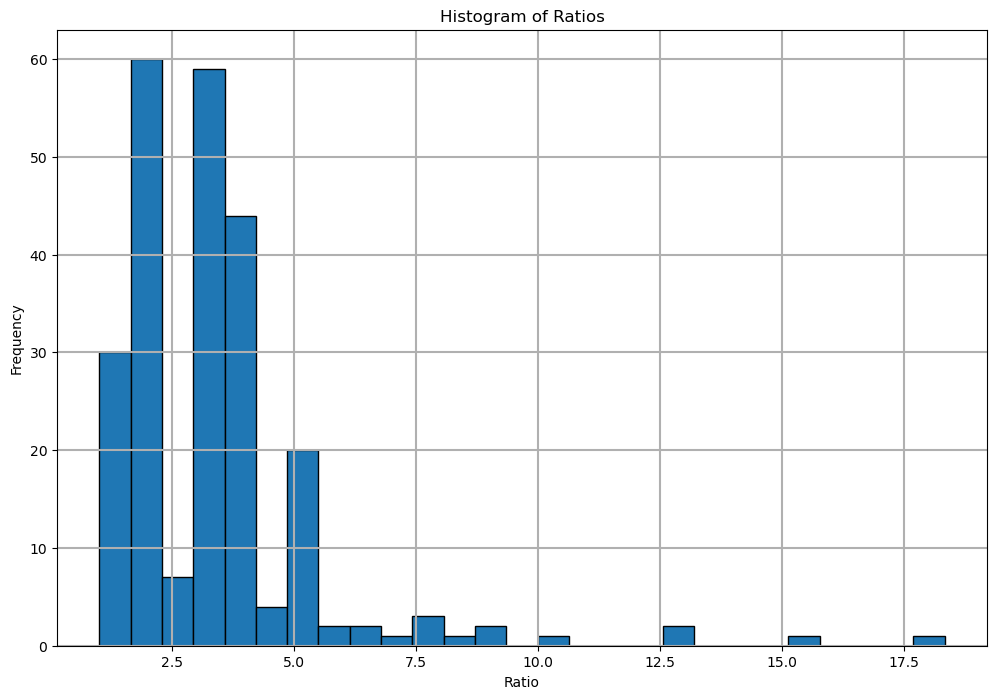

28


In [27]:
import matplotlib.pyplot as plt

# Flatten the list of lists to get all ratios in a single list
flat_ratios = [item for sublist in all_ratio_cleaned for item in sublist]

# Extract all ratios from the DataFrame and evaluate them
new_ratios = []
for ratios in flat_ratios:
        numerator, denominator = map(int, ratios.split(':'))
        ratio_value = numerator / denominator
        if ratio_value <= 20:  # Filter out values bigger than 20
            new_ratios.append(ratio_value)

# Plotting the histogram with adjusted size and grid width
plt.figure(figsize=(12, 8))  # Adjust the size as needed
hist_values, bins, _ = plt.hist(new_ratios, bins='auto', edgecolor='black')
plt.title('Histogram of Ratios')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.grid(True, linewidth=1.5)  # Adjust the linewidth for the grid
plt.show()

print(len(bins))

In [39]:
import math
import pandas as pd

results = []
err = 0.1

for index, row in odf.iterrows():
    host_name = row['Host Names']
    orbital_period_values = row['Orbital Period']

    ratios = set()  # Use a set to avoid duplicates
    
    # Calculate ratios between orbital periods
    for i in range(len(orbital_period_values)):
        for j in range(i + 1, len(orbital_period_values)):
            for denominator in range(1, 10):
                try:
                    ratio = orbital_period_values[j]['p'] / (denominator * orbital_period_values[i]['p'])
                    # Check if the ratio is close to an integer
                    rounded_ratio = round(ratio)
                    if abs(ratio - rounded_ratio) <= err and (rounded_ratio != 0 and denominator != 0):
                        # Simplify the ratio if possible
                        gcd = abs(math.gcd(int(rounded_ratio), denominator))

                        # Ensure a > b in the simplified ratio
                        numerator = int(rounded_ratio // gcd)
                        denominator = denominator // gcd
                        if numerator < denominator:
                            numerator, denominator = denominator, numerator

                        simplified_ratio = f"{numerator}:{denominator}"
                        ratios.add(simplified_ratio)
                except ZeroDivisionError:
                    pass  # Handle potential zero division errors

    if ratios:
        # Append the results to the list
        results.append({'No.': index + 1, 'Host Names': host_name, 'Orbital Period Values': orbital_period_values, 'Ratios': list(ratios)})

# Create a DataFrame from the results
rdf = pd.DataFrame(results)

print(rdf.to_string(index=False))

 No.     Host Names                                                                                     Orbital Period Values                                                                                                                               Ratios
   1         47 UMa                                                            [{'p': 1078.0}, {'p': 2391.0}, {'p': 14002.0}]                                                                                                                     [13:1, 6:1, 3:2]
   2         55 Cnc                          [{'p': 14.6516}, {'p': 44.3989}, {'p': 5574.2}, {'p': 0.7365474}, {'p': 259.88}]                                                                                     [18:7, 3:1, 76:5, 14:9, 3:2, 2:1, 7:2, 6:1, 9:2]
   3         61 Vir                                                              [{'p': 4.215}, {'p': 38.021}, {'p': 123.01}]                                                                                                  

In [40]:
# rdf = rdf[:25]

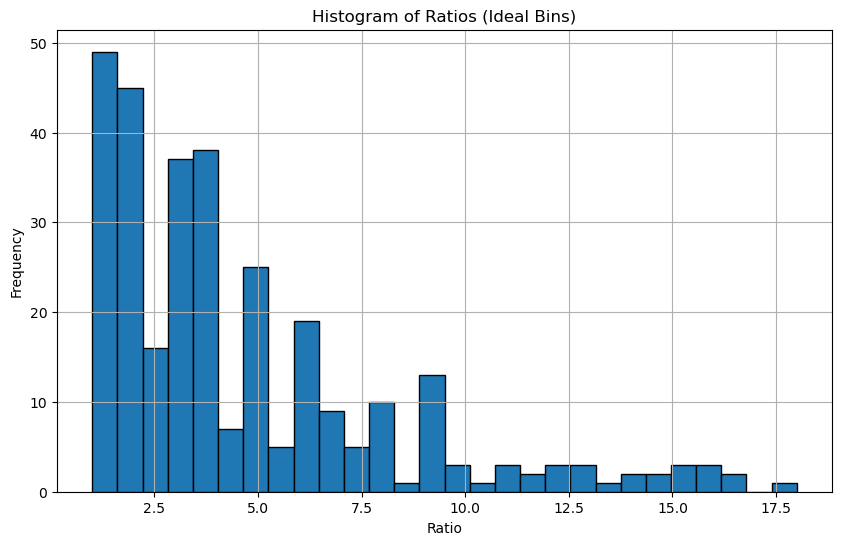

In [41]:
import matplotlib.pyplot as plt

# Extract all ratios from the DataFrame and evaluate them
all_ratios = []
for ratios in rdf['Ratios']:
    for ratio in ratios:
        numerator, denominator = map(int, ratio.split(':'))
        ratio_value = numerator / denominator
        if ratio_value <= 20:  # Filter out values bigger than 20
            all_ratios.append(ratio_value)

# Plot the histogram with the ideal bin number
plt.figure(figsize=(10, 6))
plt.hist(all_ratios, bins=len(bins), edgecolor='black')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Ratios (Ideal Bins)')
plt.grid(True)
plt.show()

In [42]:
sim_ratios = new_ratios
existing_ratios = all_ratios

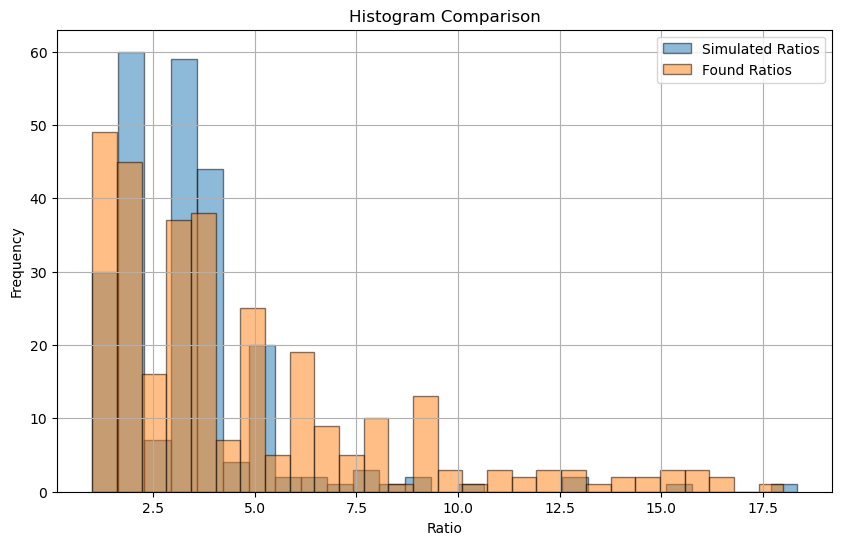

In [43]:
# Plotting the histograms
plt.figure(figsize=(10, 6))  # Adjust size as needed

# Plot histogram for new_ratios
plt.hist(sim_ratios, bins='auto', edgecolor='black', alpha=0.5, label='Simulated Ratios')

# Plot histogram for all_ratios
plt.hist(existing_ratios, bins=28, edgecolor='black', alpha=0.5, label='Found Ratios')

# Add labels and title
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.legend()  # Show legend
plt.grid(True)  # Show grid

# Show the plot
plt.show()